In [293]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
plt.style.use('classic')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('figure', facecolor='w')
rc('axes', labelsize=15)
from matplotlib import cm
from astropy.io import fits, ascii
import math

In [294]:
# test = pd.read_csv('/home/jess/Desktop/Research/Mdwarf_project/cannon_runs/apogee_test/test_results/safe_sample_final.csv.gz')
test = pd.read_csv('/home/jess/Desktop/Research/Mdwarf_project/cannon_runs/apogee_test/safe_results_ruwe.csv')

In [295]:
print(len(test))
test.keys()

10310


Index(['SOURCE_ID', 'RUWE', 'SAFE_SELECTION_OID', 'COL1', 'APOGEE_ID',
       'BP_MAG', 'BP_RP', 'DEC', 'GAIA_ID', 'G_MAG', 'H_MAG', 'H_MAG_ERR',
       'J_MAG', 'J_MAG_ERR', 'K_MAG', 'K_MAG_ERR', 'M_H_APOGEE', 'PLX',
       'PLX_ERR', 'PMDEC', 'PMDEC_ERR', 'PMRA', 'PMRA_ERR', 'RA', 'RP_MAG',
       'RV_APOGEE', 'RV_APOGEE_ERR', 'RV_GAIA', 'RV_GAIA_ERR', 'SNR',
       'TEFF_APOGEE', 'DIST', 'G_ABS', 'J_ABS', 'H_ABS', 'K_ABS', 'X', 'Y',
       'Z', 'Vx', 'Vy', 'Vz', 'TEFF', 'FE_H', 'CHI_MANN', 'SPT', 'CHI_WEST',
       'LINE1', 'LINE2'],
      dtype='object')

/home/jess/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


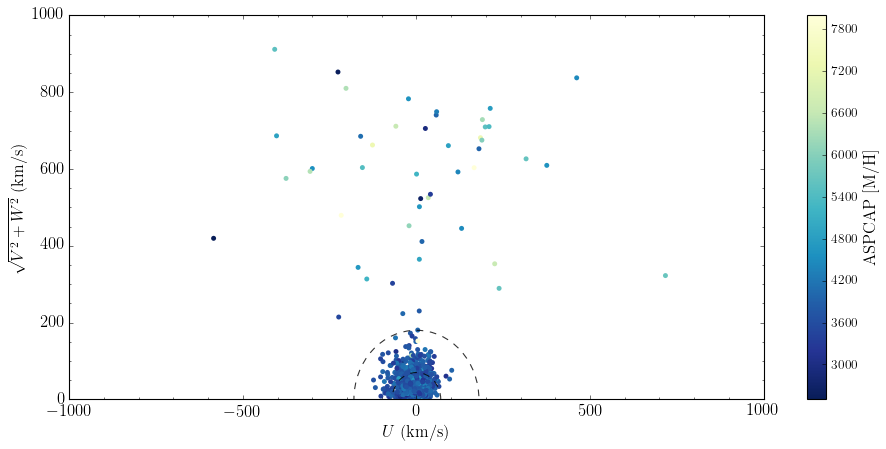

In [296]:
maxr = 1000
rlines = [70,180]
# rlines = np.arange(0,maxr+1,100)
sel = test[test['M_H_APOGEE'] > -2.5][test['M_H_APOGEE'] < .5]

plt.figure(figsize=(14,6))
plt.tick_params(labelsize=15)
ax = plt.gca()
ax.cla()
plt.scatter(sel['Vy']-220, np.sqrt(sel['Vx']**2+sel['Vz']**2), edgecolor='none', c=sel['TEFF_APOGEE'], cmap='YlGnBu_r')
plt.colorbar().set_label(r'ASPCAP [M/H]', fontsize=15)

for radius in rlines:
    circ = plt.Circle((0, 0), radius, color='k', linestyle='--', fill=False, alpha=.8)
    ax.add_artist(circ)

plt.xlabel(r'$U$ (km/s)', fontsize=15)
plt.ylabel(r'$\sqrt{V^2+W^2}$ (km/s)', fontsize=15)
plt.ylim(0, maxr)
plt.xlim(-maxr, maxr)
plt.minorticks_on()
plt.show()

/home/jess/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


9905 351 54


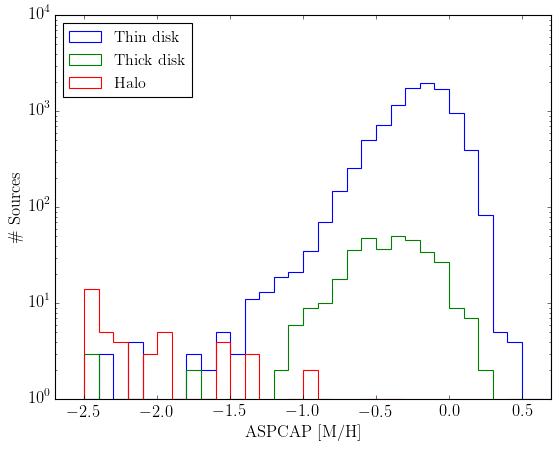

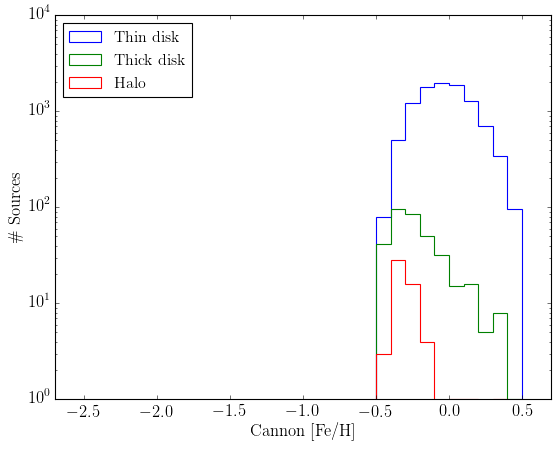

In [297]:
thin_vel = 70
thick_vel = 180

vtot = np.sqrt(test['Vx']**2 + (test['Vy']-220)**2 + test['Vz']**2)

thin  = test[vtot < thin_vel]
thick = test[vtot > thin_vel][vtot < thick_vel]
halo  = test[vtot > thick_vel]

print(len(thin), len(thick), len(halo))
bins = np.arange(-3,1,.1)

plt.tick_params(labelsize=15)
plt.hist(thin['M_H_APOGEE'], bins=bins, histtype='step', label='Thin disk')
plt.hist(thick['M_H_APOGEE'], bins=bins, histtype='step', label='Thick disk')
plt.hist(halo['M_H_APOGEE'], bins=bins, histtype='step', label='Halo')
plt.legend(loc='upper left')
plt.xlabel('ASPCAP [M/H]', fontsize=15)
plt.ylabel('\# Sources', fontsize=15)
plt.xlim(-2.7,.7)
plt.yscale('log')
plt.show()

#================

plt.tick_params(labelsize=15)
plt.hist(thin['FE_H'], bins=bins, histtype='step', label='Thin disk')
plt.hist(thick['FE_H'], bins=bins, histtype='step', label='Thick disk')
plt.hist(halo['FE_H'], bins=bins, histtype='step', label='Halo')
plt.legend(loc='upper left')
plt.xlabel('Cannon [Fe/H]', fontsize=15)
plt.ylabel('\# Sources', fontsize=15)
plt.xlim(-2.7,.7)
plt.yscale('log')
plt.show()

/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


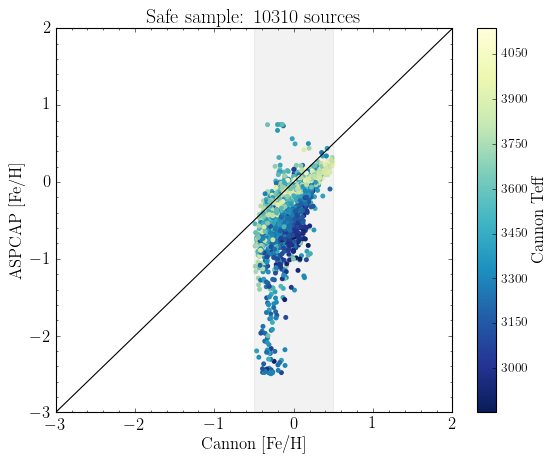

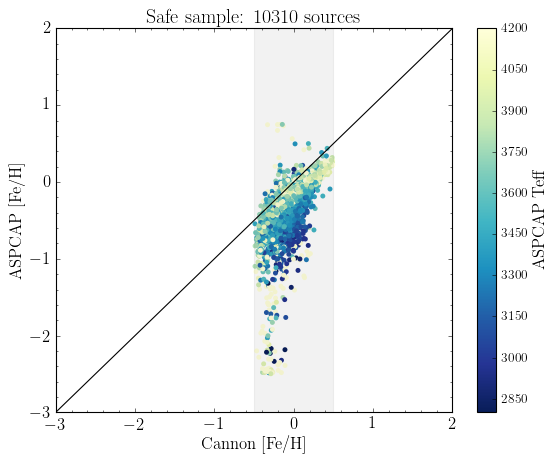

In [298]:
x = np.arange(-10,10,.5)
plt.tick_params(labelsize=15)
plt.scatter(test['FE_H'], test['M_H_APOGEE'], c=test['TEFF'], edgecolor='none', cmap='YlGnBu_r')
plt.axvspan(-.5, .5, alpha=.05, color='k')
plt.plot(x,x, color='k')
cb = plt.colorbar()
cb.set_label(r'Cannon Teff', fontsize=15)
plt.xlabel('Cannon [Fe/H]', fontsize=15)
plt.ylabel('ASPCAP [Fe/H]', fontsize=15)
plt.title(r'Safe sample: %s sources'%(len(test)), fontsize=18)
plt.xlim(-3,2)
plt.ylim(-3,2)
plt.minorticks_on()
plt.show()

# ===============

plt.tick_params(labelsize=15)
plt.scatter(test['FE_H'], test['M_H_APOGEE'], c=np.clip(test['TEFF_APOGEE'],2800,4200), edgecolor='none', cmap='YlGnBu_r')
plt.axvspan(-.5, .5, alpha=.05, color='k')
plt.plot(x,x, color='k')
cb = plt.colorbar()
cb.set_label(r'ASPCAP Teff', fontsize=15)
plt.xlabel('Cannon [Fe/H]', fontsize=15)
plt.ylabel('ASPCAP [Fe/H]', fontsize=15)
plt.title(r'Safe sample: %s sources'%(len(test)), fontsize=18)
plt.xlim(-3,2)
plt.ylim(-3,2)
plt.minorticks_on()
plt.show()

### Cut by ASPCAP parameters

In [299]:
new = test[test['TEFF_APOGEE'] < 4200][test['TEFF_APOGEE'] > 2850][test['M_H_APOGEE'] > -.5][test['M_H_APOGEE'] < .5]

/home/jess/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### Test different RUWE cut values

/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


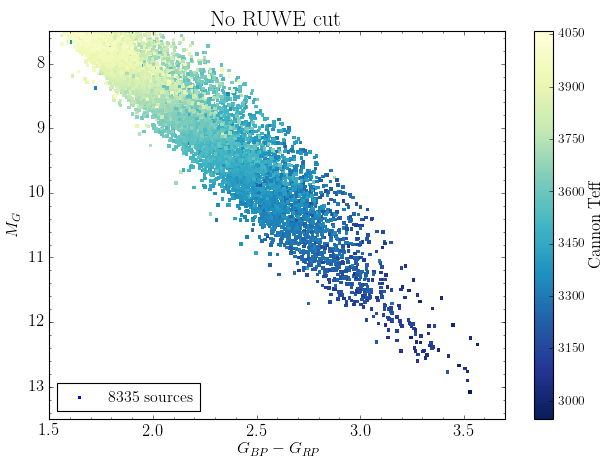

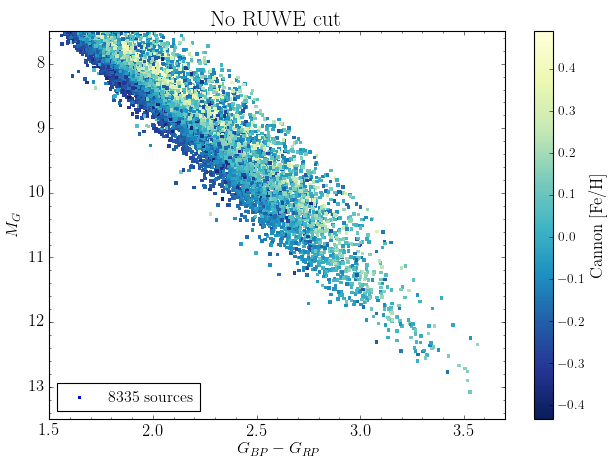

In [300]:
rcut = 1.4
# sel = new[new['RUWE'] < rcut]
sel = new

#===================

pl = plt.scatter(sel['BP_RP'], sel['G_ABS'], c=sel['TEFF'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label=str(len(sel['BP_RP']))+' sources')

cb = plt.colorbar(pl)
cb.set_label(r'Cannon Teff', fontsize=15)
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
plt.ylabel(r'$M_{G}$', fontsize=15)
plt.ylim(13.5,7.5)
plt.xlim(1.5,3.7)
plt.legend(loc='lower left', scatterpoints=1)
# plt.title(r'RUWE $<$ '+str(rcut), fontsize=20)
plt.title(r'No RUWE cut', fontsize=20)
plt.tick_params(labelsize=15)
plt.minorticks_on()
plt.tight_layout()
plt.show()

#===================

pl = plt.scatter(sel['BP_RP'], sel['G_ABS'], c=sel['FE_H'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label=str(len(sel['BP_RP']))+' sources')

cb = plt.colorbar(pl)
cb.set_label(r'Cannon [Fe/H]', fontsize=15)
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
plt.ylabel(r'$M_{G}$', fontsize=15)
plt.ylim(13.5,7.5)
plt.xlim(1.5,3.7)
plt.legend(loc='lower left', scatterpoints=1)
# plt.title(r'RUWE $<$ '+str(rcut), fontsize=20)
plt.title(r'No RUWE cut', fontsize=20)
plt.tick_params(labelsize=15)
plt.minorticks_on()
plt.tight_layout()
plt.show()

/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


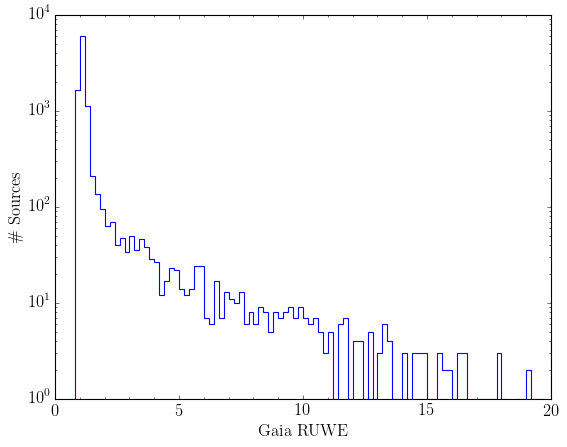

In [301]:
plt.hist(test['RUWE'], bins=np.arange(0,70,.2), histtype='step')
plt.xlabel('Gaia RUWE', fontsize=15)
plt.ylabel('\# Sources', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(0,20)
plt.yscale('log')
plt.minorticks_on()
plt.show()

### Cut by RUWE value

In [302]:
ruwe_cut = new[new['RUWE'] < 1.2]

In [303]:
test = ruwe_cut
len(test)

6221

### CMD cut

In [304]:
p = [[3.5, 12], [1.87, 7.5]]
slope = [(p[1][1] - p[0][1])/(p[1][0] - p[0][0])]
inter = [p[0][1] - slope[0]*p[0][0]]

test['line'] = test['BP_RP']*slope[0] + inter[0]

/home/jess/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


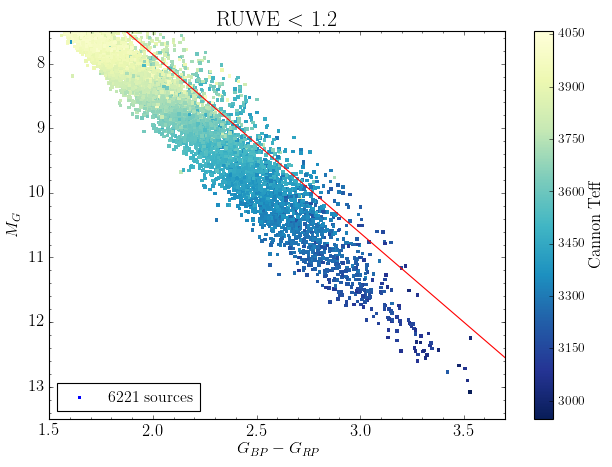

In [340]:
xarr = np.arange(0,20)
yarr = slope[0]*xarr + inter[0]

sel = ruwe_cut
pl = plt.scatter(sel['BP_RP'], sel['G_ABS'], c=sel['TEFF'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label=str(len(sel['BP_RP']))+' sources')
plt.plot(xarr, yarr, color='r')
cb = plt.colorbar(pl)
cb.set_label(r'Cannon Teff', fontsize=15)
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
plt.ylabel(r'$M_{G}$', fontsize=15)
plt.ylim(13.5,7.5)
plt.xlim(1.5,3.7)
plt.legend(loc='lower left', scatterpoints=1)
plt.tick_params(labelsize=15)
plt.title(r'RUWE $<$ 1.2', fontsize=20)
plt.minorticks_on()
plt.tight_layout()
plt.show()

/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


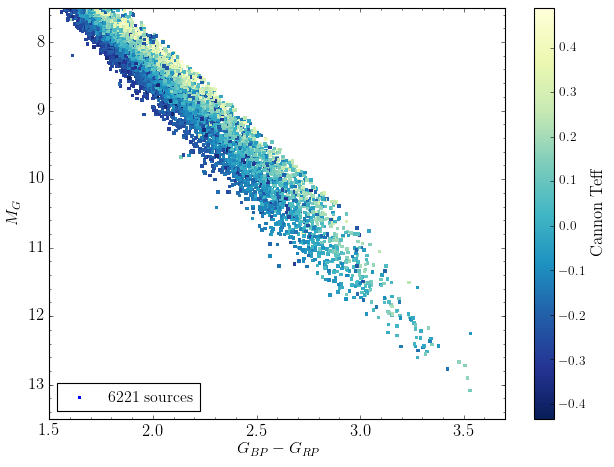

In [306]:
line_sel = test.query('G_ABS > line')

sel = line_sel
pl = plt.scatter(sel['BP_RP'], sel['G_ABS'], c=sel['FE_H'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label=str(len(test['BP_RP']))+' sources')
# plt.plot(xarr, yarr, color='r')
cb = plt.colorbar(pl)
cb.set_label(r'Cannon Teff', fontsize=15)
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
plt.ylabel(r'$M_{G}$', fontsize=15)
plt.ylim(13.5,7.5)
plt.xlim(1.5,3.7)
plt.legend(loc='lower left', scatterpoints=1)
plt.tick_params(labelsize=15)
plt.minorticks_on()
plt.tight_layout()
plt.show()

### Apply CMD selection

In [307]:
test = line_sel
len(test)

5875

### Final diagnostic plots

/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


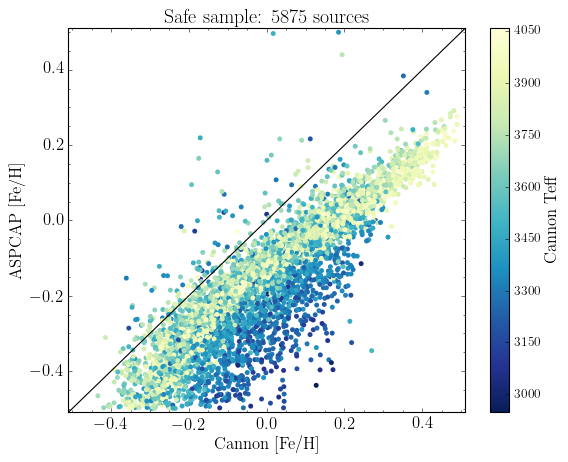

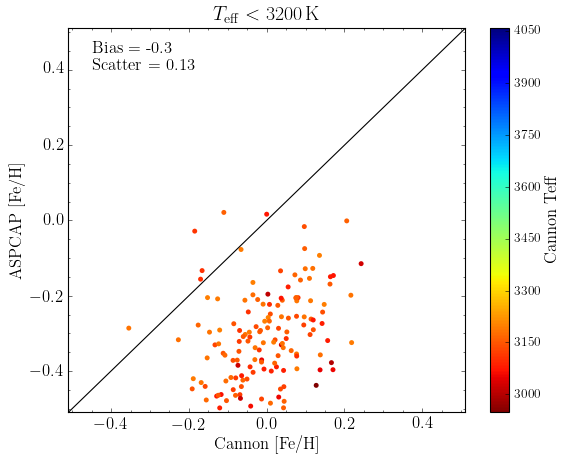

/home/jess/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


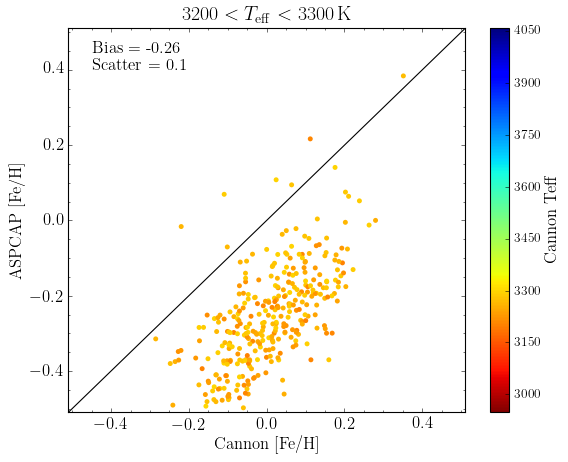

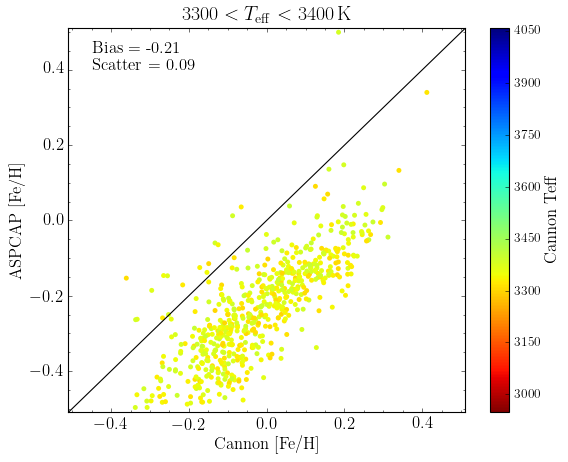

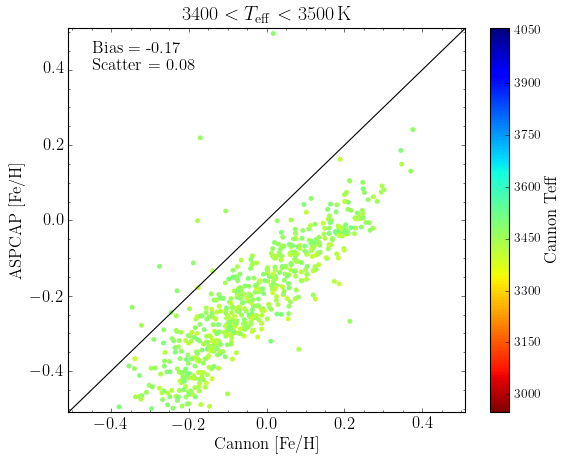

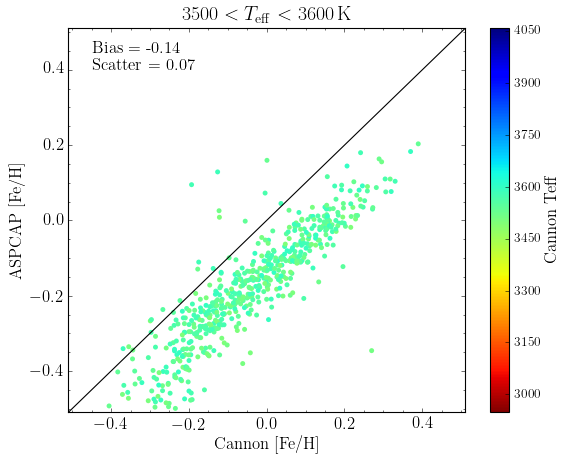

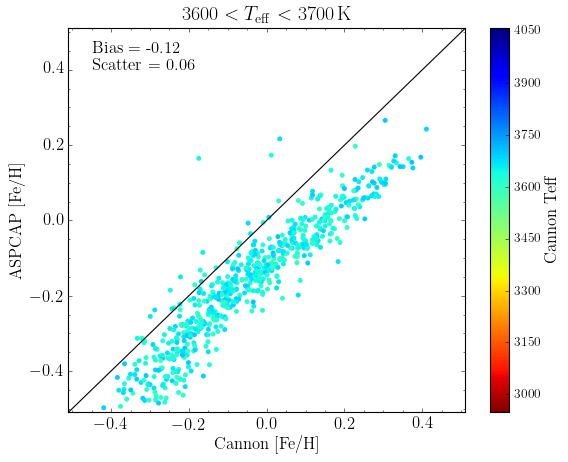

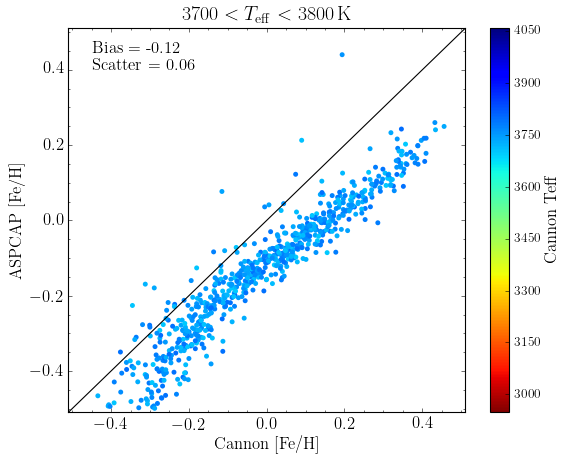

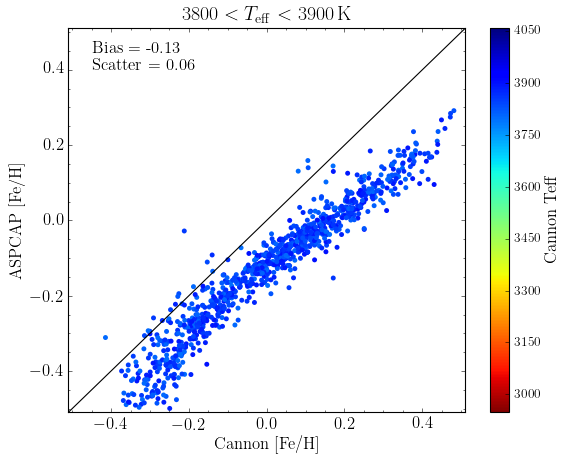

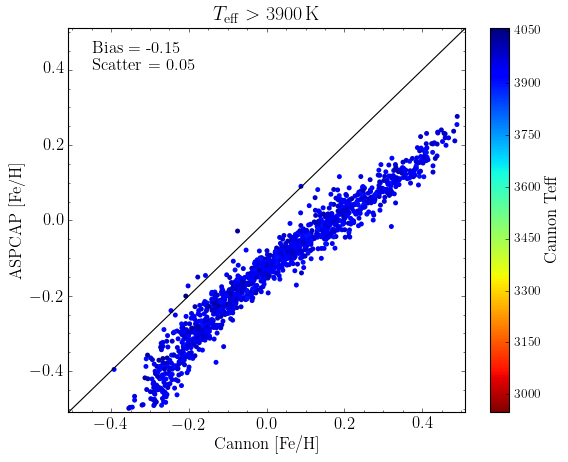

In [319]:
x = np.arange(-10,10,.5)
pl = plt.scatter(test['FE_H'], test['M_H_APOGEE'], c=test['TEFF'], edgecolor='none', cmap='YlGnBu_r')
# plt.axvspan(-.5, .5, alpha=.05, color='k')
plt.plot(x,x, color='k')
cb = plt.colorbar(pl)
cb.set_label(r'Cannon Teff', fontsize=15)
plt.xlabel('Cannon [Fe/H]', fontsize=15)
plt.ylabel('ASPCAP [Fe/H]', fontsize=15)
plt.title(r'Safe sample: %s sources'%(len(test)), fontsize=18)
plt.xlim(-.51,.51)
plt.ylim(-.51,.51)
plt.minorticks_on()
plt.tick_params(labelsize=15)
plt.show()

# ===============

# val = 3100

sel = test[test['TEFF'] < 3200]

diff = sel['M_H_APOGEE'] - sel['FE_H']
bias = np.mean(diff)
scat = np.std(diff)

plt.scatter(sel['FE_H'], sel['M_H_APOGEE'], c=sel['TEFF'], edgecolor='none', cmap='jet_r')
plt.plot(x,x, color='k')
plt.text(-.45, .4, 'Bias = %s \nScatter = %s'%(round(bias,2), round(scat,2)), fontsize=15)
cb = plt.colorbar()
cb.set_label(r'Cannon Teff', fontsize=15)
plt.clim(min(test['TEFF']), max(test['TEFF']))
plt.xlabel('Cannon [Fe/H]', fontsize=15)
plt.ylabel('ASPCAP [Fe/H]', fontsize=15)
plt.title(r'$T_{\rm eff}<3200$\,K', fontsize=18)
plt.xlim(-.51,.51)
plt.ylim(-.51,.51)
plt.minorticks_on()
plt.tick_params(labelsize=15)
plt.show()
    
for val in np.arange(3200,3900,100):
    sel = test[test['TEFF'] > val][test['TEFF'] < val+100]
    
    diff = sel['M_H_APOGEE'] - sel['FE_H']
    bias = np.mean(diff)
    scat = np.std(diff)

    plt.scatter(sel['FE_H'], sel['M_H_APOGEE'], c=sel['TEFF'], edgecolor='none', cmap='jet_r')
    plt.plot(x,x, color='k')
    plt.text(-.45, .4, 'Bias = %s \nScatter = %s'%(round(bias,2), round(scat,2)), fontsize=15)
    cb = plt.colorbar()
    cb.set_label(r'Cannon Teff', fontsize=15)
    plt.clim(min(test['TEFF']), max(test['TEFF']))
    plt.xlabel('Cannon [Fe/H]', fontsize=15)
    plt.ylabel('ASPCAP [Fe/H]', fontsize=15)
    plt.title(r'$%s<T_{\rm eff}<%s$\,K'%(str(val), str(val+100)), fontsize=18)
    plt.xlim(-.51,.51)
    plt.ylim(-.51,.51)
    plt.minorticks_on()
    plt.tick_params(labelsize=15)
    plt.show()
    
sel = test[test['TEFF'] > 3900]

diff = sel['M_H_APOGEE'] - sel['FE_H']
bias = np.mean(diff)
scat = np.std(diff)

plt.scatter(sel['FE_H'], sel['M_H_APOGEE'], c=sel['TEFF'], edgecolor='none', cmap='jet_r')
plt.plot(x,x, color='k')
plt.text(-.45, .4, 'Bias = %s \nScatter = %s'%(round(bias,2), round(scat,2)), fontsize=15)
cb = plt.colorbar()
cb.set_label(r'Cannon Teff', fontsize=15)
plt.clim(min(test['TEFF']), max(test['TEFF']))
plt.xlabel('Cannon [Fe/H]', fontsize=15)
plt.ylabel('ASPCAP [Fe/H]', fontsize=15)
plt.title(r'$T_{\rm eff}>3900$\,K', fontsize=18)
plt.xlim(-.51,.51)
plt.ylim(-.51,.51)
plt.minorticks_on()
plt.tick_params(labelsize=15)
plt.show()

In [321]:
np.mean(test['M_H_APOGEE'] - test['FE_H']), np.std(test['M_H_APOGEE'] - test['FE_H']) 

(-0.15779087334911293, 0.08348198954591265)

/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


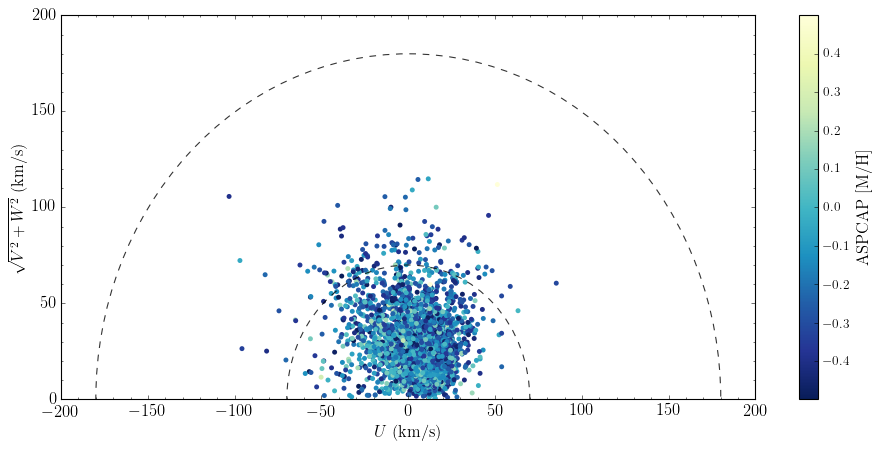

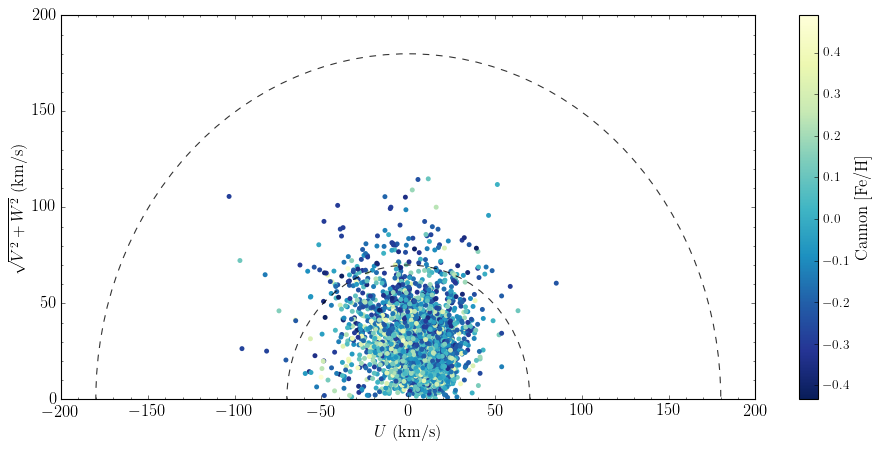

In [309]:
maxr = 200
rlines = [70,180]
# rlines = np.arange(0,maxr+1,100)
sel = test

plt.figure(figsize=(14,6))
plt.tick_params(labelsize=15)
ax = plt.gca()
ax.cla()
plt.scatter(sel['Vy']-220, np.sqrt(sel['Vx']**2+sel['Vz']**2), edgecolor='none', c=sel['M_H_APOGEE'], cmap='YlGnBu_r')
plt.colorbar().set_label(r'ASPCAP [M/H]', fontsize=15)

for radius in rlines:
    circ = plt.Circle((0, 0), radius, color='k', linestyle='--', fill=False, alpha=.8)
    ax.add_artist(circ)

plt.xlabel(r'$U$ (km/s)', fontsize=15)
plt.ylabel(r'$\sqrt{V^2+W^2}$ (km/s)', fontsize=15)
plt.ylim(0, maxr)
plt.xlim(-maxr, maxr)
plt.minorticks_on()
plt.show()


#================

plt.figure(figsize=(14,6))
plt.tick_params(labelsize=15)
ax = plt.gca()
ax.cla()
plt.scatter(sel['Vy']-220, np.sqrt(sel['Vx']**2+sel['Vz']**2), edgecolor='none', c=sel['FE_H'], cmap='YlGnBu_r')
plt.colorbar().set_label(r'Cannon [Fe/H]', fontsize=15)

for radius in rlines:
    circ = plt.Circle((0, 0), radius, color='k', linestyle='--', fill=False, alpha=.8)
    ax.add_artist(circ)

plt.xlabel(r'$U$ (km/s)', fontsize=15)
plt.ylabel(r'$\sqrt{V^2+W^2}$ (km/s)', fontsize=15)
plt.ylim(0, maxr)
plt.xlim(-maxr, maxr)
plt.minorticks_on()
plt.show()

/home/jess/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


5731 144 0


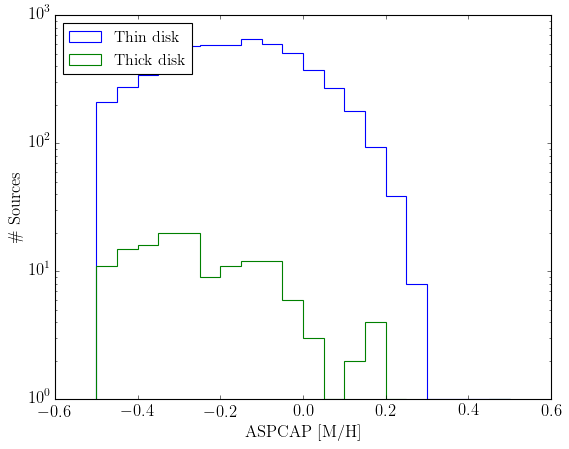

-0.1634712294210438 0.16317304719606623
-0.2390852916666667 0.17417569954609996


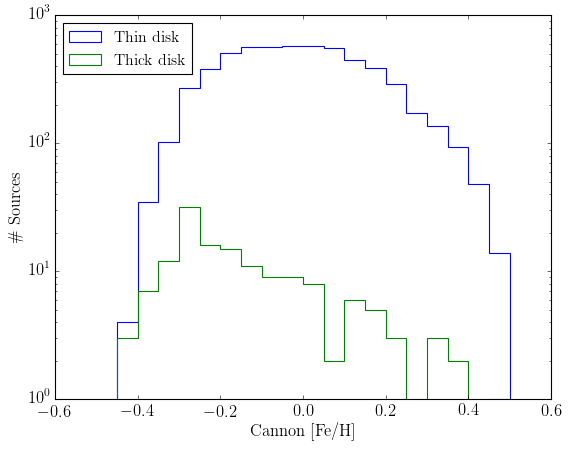

-0.004167763503014868 0.17315101958002702
-0.1414935017373783 0.18866089873848593


In [310]:
thin_vel = 70
thick_vel = 180

vtot = np.sqrt(test['Vx']**2 + (test['Vy']-220)**2 + test['Vz']**2)

thin  = test[vtot < thin_vel]
thick = test[vtot > thin_vel][vtot < thick_vel]
halo  = test[vtot > thick_vel]

print(len(thin), len(thick), len(halo))
bins = np.arange(-3,1,.05)

plt.tick_params(labelsize=15)
plt.hist(thin['M_H_APOGEE'], bins=bins, histtype='step', label='Thin disk')
plt.hist(thick['M_H_APOGEE'], bins=bins, histtype='step', label='Thick disk')
# plt.hist(halo['M_H_APOGEE'], bins=bins, histtype='step', label='Halo')
plt.legend(loc='upper left')
plt.xlabel('ASPCAP [M/H]', fontsize=15)
plt.ylabel('\# Sources', fontsize=15)
plt.xlim(-.6,.6)
plt.yscale('log')
plt.show()

print(np.mean(thin['M_H_APOGEE']), np.std(thin['M_H_APOGEE']))
print(np.mean(thick['M_H_APOGEE']), np.std(thick['M_H_APOGEE']))

#================

plt.tick_params(labelsize=15)
plt.hist(thin['FE_H'], bins=bins, histtype='step', label='Thin disk')
plt.hist(thick['FE_H'], bins=bins, histtype='step', label='Thick disk')
# plt.hist(halo['FE_H'], bins=bins, histtype='step', label='Halo')
plt.legend(loc='upper left')
plt.xlabel('Cannon [Fe/H]', fontsize=15)
plt.ylabel('\# Sources', fontsize=15)
plt.xlim(-.6,.6)
plt.yscale('log')
plt.show()

print(np.mean(thin['FE_H']), np.std(thin['FE_H']))
print(np.mean(thick['FE_H']), np.std(thick['FE_H']))

/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


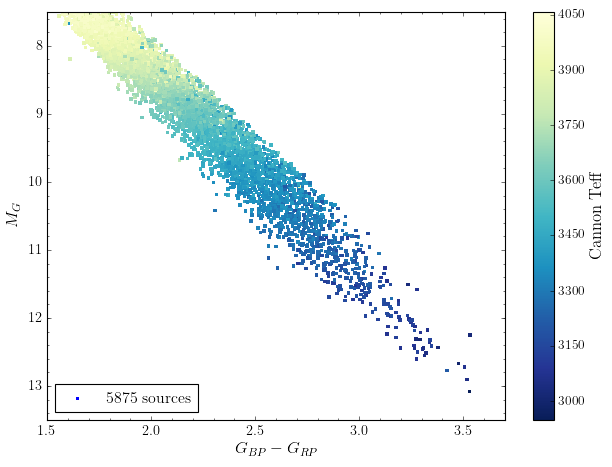

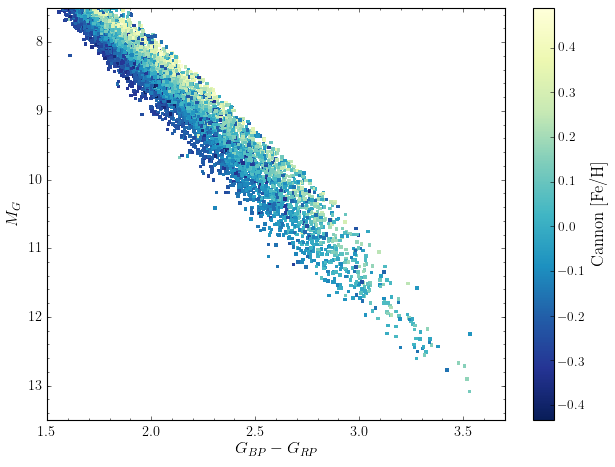

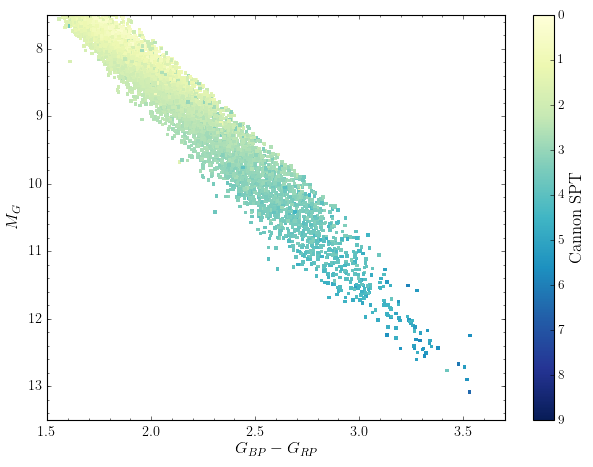

In [311]:
# sel = test[test['FE_H'] > -.25][test['FE_H'] < -.15]
sel = test
pl = plt.scatter(sel['BP_RP'], sel['G_ABS'], c=sel['TEFF'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label=str(len(test['BP_RP']))+' sources')

plt.colorbar(pl, orientation='vertical').set_label(r'Cannon Teff', fontsize=15)
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
plt.ylabel(r'$M_{G}$', fontsize=15)
plt.ylim(13.5,7.5)
plt.xlim(1.5,3.7)
plt.legend(loc='lower left', scatterpoints=1)
plt.tick_params(labelsize=13)
plt.minorticks_on()
plt.tight_layout()
plt.savefig('/home/jess/Desktop/Research/Mdwarf_project/paper/figures/cmd_teff_safe.png')
plt.show()

#===================

pl = plt.scatter(sel['BP_RP'], sel['G_ABS'], c=sel['FE_H'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s')

cb = plt.colorbar(pl)
cb.set_label(r'Cannon [Fe/H]', fontsize=15)
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
plt.ylabel(r'$M_{G}$', fontsize=15)
plt.ylim(13.5,7.5)
plt.xlim(1.5,3.7)
# plt.legend(loc='lower left', scatterpoints=1)
plt.tick_params(labelsize=13)
plt.minorticks_on()
plt.tight_layout()
plt.savefig('/home/jess/Desktop/Research/Mdwarf_project/paper/figures/cmd_feh_safe.png')
plt.show()

#===================

pl = plt.scatter(sel['BP_RP'], sel['G_ABS'], c=sel['SPT'], cmap='YlGnBu', edgecolor='none', s=10, marker='s')

cb = plt.colorbar(pl)
cb.set_label(r'Cannon SPT', fontsize=15)
plt.clim(0,9)
cb.ax.invert_yaxis() 
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
plt.ylabel(r'$M_{G}$', fontsize=15)
plt.ylim(13.5,7.5)
plt.xlim(1.5,3.7)
# plt.legend(loc='lower left', scatterpoints=1)
plt.tick_params(labelsize=13)
plt.minorticks_on()
plt.tight_layout()
plt.savefig('/home/jess/Desktop/Research/Mdwarf_project/paper/figures/cmd_spt_safe.png')
plt.show()

In [242]:
test.to_csv('/home/jess/Desktop/Research/Mdwarf_project/cannon_runs/apogee_test/FINAL_CATALOG.csv')

### Sky projections

In [142]:
import astropy.coordinates as coord
import astropy.units as u

data = test
ra = coord.Angle(data['RA']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(data['DEC']*u.degree)

/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


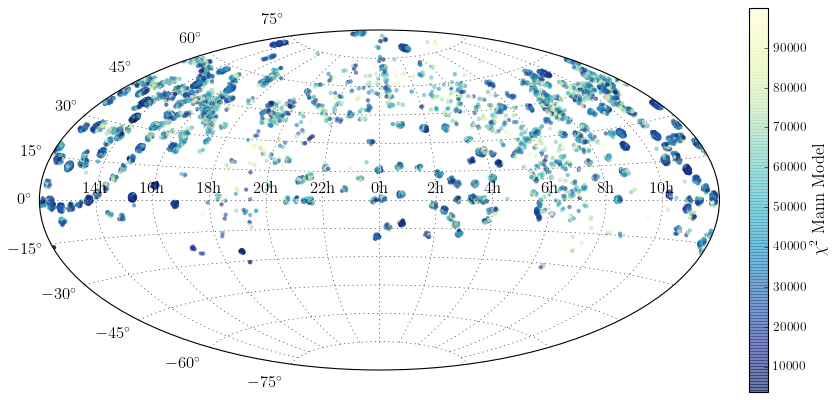

8335


In [143]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection="aitoff")
im = ax.scatter(ra.radian, dec.radian, edgecolor='none', c=np.clip(data['CHI_MANN'],0,100000), \
           s=15, alpha=.6, cmap='YlGnBu_r')
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid(True)
cb = fig.colorbar(im, ax=ax, orientation='vertical',fraction=0.046, pad=0.04)
cb.set_label(r'$\chi^2$ Mann Model', fontsize=15)
# plt.savefig('comments/figures/aitoff.png')
plt.show()

print(len(data))

### Color-temperature comparisons

In [248]:
apass_match = pd.read_csv('/home/jess/Desktop/Research/Mdwarf_project/cannon_runs/apogee_test/FINAL_CATALOG_x_APASS.csv')
apass_match.keys()

Index(['col1', 'SOURCE_ID', 'RUWE', 'SAFE_SELECTION_OID', 'COL1', 'APOGEE_ID',
       'BP_MAG', 'BP_RP', 'DEC', 'GAIA_ID', 'G_MAG', 'H_MAG', 'H_MAG_ERR',
       'J_MAG', 'J_MAG_ERR', 'K_MAG', 'K_MAG_ERR', 'M_H_APOGEE', 'PLX',
       'PLX_ERR', 'PMDEC', 'PMDEC_ERR', 'PMRA', 'PMRA_ERR', 'RA', 'RP_MAG',
       'RV_APOGEE', 'RV_APOGEE_ERR', 'RV_GAIA', 'RV_GAIA_ERR', 'SNR',
       'TEFF_APOGEE', 'DIST', 'G_ABS', 'J_ABS', 'H_ABS', 'K_ABS', 'X', 'Y',
       'Z', 'Vx', 'Vy', 'Vz', 'TEFF', 'FE_H', 'CHI_MANN', 'SPT', 'CHI_WEST',
       'LINE1', 'LINE2', 'line', 'RAJ2000', 'DEJ2000', 'errHalfMaj',
       'errHalfMin', 'errPosAng', 'field', 'nobs', 'mobs', 'B-V', 'e_B-V',
       'Vmag', 'e_Vmag', 'u_e_Vmag', 'Bmag', 'e_Bmag', 'u_e_Bmag', 'gpmag',
       'e_gpmag', 'u_e_gpmag', 'rpmag', 'e_rpmag', 'u_e_rpmag', 'ipmag',
       'e_ipmag', 'u_e_ipmag', 'angDist'],
      dtype='object')

In [270]:
apass_match = apass_match[pd.notnull(apass_match['Vmag'])]

(1702, 1702)

In [271]:
v_j = np.array(apass_match['Vmag'] - apass_match['J_MAG'])
v_k = np.array(apass_match['Vmag'] - apass_match['K_MAG'])

# Mann relations
vj_teff = 3500*(2.515 - 1.054*v_j + 0.2965*(v_j)**2 - 0.04150*(v_j)**3 + 0.002245*(v_j)**4 + 0.05262*apass_match['FE_H'])
vj_diff = apass_match['TEFF'] - vj_teff

vj_teff_ap = 3500*(2.515 - 1.054*v_j + 0.2965*(v_j)**2 - 0.04150*(v_j)**3 + 0.002245*(v_j)**4 + 0.05262*apass_match['M_H_APOGEE'])
vj_diff_ap = apass_match['TEFF_APOGEE'] - vj_teff_ap

# Casagrande relation
vk_teff = 5040/(-0.4809 + 0.8009*v_k - 0.1039*(v_k)**2 + 0.0056*(v_k)**3)
vk_diff = apass_match['TEFF'] - vk_teff
vk_diff_ap = apass_match['TEFF_APOGEE'] - vk_teff

# Boyajian relation
# vk_teff2 = 8984 - 2914*v_k + 588*(v_k)**2 - 47.4*(v_k)**3
vk_teff2 = 7643 - 1523*(v_k) + 134*(v_k)**2 + 137*(v_k)*apass_match['FE_H'] - 202*apass_match['FE_H'] + 157*(apass_match['FE_H'])**2
vk_diff2 = apass_match['TEFF'] - vk_teff2

vk_teff_ap2 = 7643 - 1523*(v_k) + 134*(v_k)**2 + 137*(v_k)*apass_match['M_H_APOGEE'] - 202*apass_match['M_H_APOGEE'] + 157*(apass_match['M_H_APOGEE'])**2
vk_diff_ap2 = apass_match['TEFF_APOGEE'] - vk_teff_ap2

x = np.linspace(2000,5000)

/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


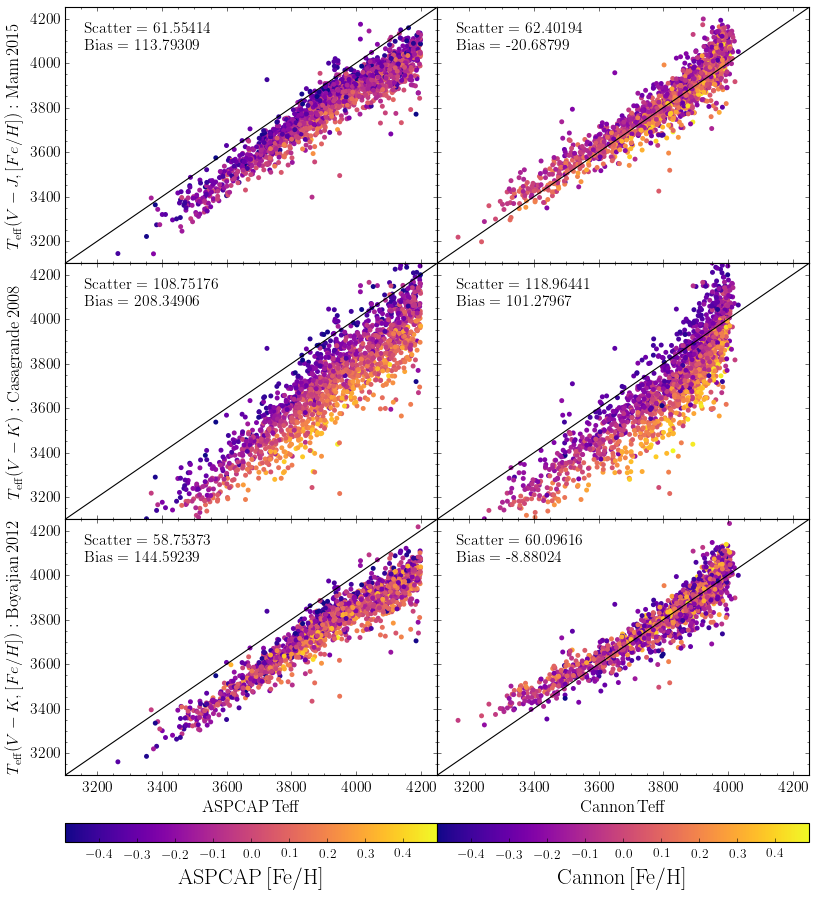

In [371]:
text1 = 'Scatter = %s \nBias = %s'%(round(np.std(vj_diff_ap),5), round(np.mean(vj_diff_ap),5))
text2 = 'Scatter = %s \nBias = %s'%(round(np.std(vj_diff),5), round(np.mean(vj_diff),5))
text3 = 'Scatter = %s \nBias = %s'%(round(np.std(vk_diff_ap),5), round(np.mean(vk_diff_ap),5))
text4 = 'Scatter = %s \nBias = %s'%(round(np.std(vk_diff),5), round(np.mean(vk_diff),5))
text5 = 'Scatter = %s \nBias = %s'%(round(np.std(vk_diff_ap2),5), round(np.mean(vk_diff_ap2),5))
text6 = 'Scatter = %s \nBias = %s'%(round(np.std(vk_diff2),5), round(np.mean(vk_diff2),5))

x = np.arange(2000,5000,100)

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=[12,15], sharex=True, sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)

ax1.plot(x,x, color='k')
ax1.text(0.05, 0.95, text1, fontsize=14, transform=ax1.transAxes, verticalalignment='top')
im1 = ax1.scatter(apass_match['TEFF_APOGEE'], vj_teff_ap, edgecolor='none', c=np.clip(apass_match['M_H_APOGEE'],-.5,.5),
                  cmap='plasma')
ax1.set_xlim(3100,4250)
ax1.set_ylim(3100,4250)
ax1.set_ylabel(r'$T_{\rm eff}(V-J, [Fe/H]): {\rm Mann \, 2015}$', fontsize=15)

ax2.plot(x,x, color='k')
ax2.text(0.05, 0.95, text2, fontsize=14, transform=ax2.transAxes, verticalalignment='top')
im2 = ax2.scatter(apass_match['TEFF'], vj_teff, edgecolor='none', c=apass_match['FE_H'], cmap='plasma')

#===========
ax3.plot(x,x, color='k')
ax3.text(0.05, 0.95, text3, fontsize=14, transform=ax3.transAxes, verticalalignment='top')
ax3.scatter(apass_match['TEFF_APOGEE'], vk_teff, edgecolor='none', c=np.clip(apass_match['M_H_APOGEE'],-.5,.5),
           cmap='plasma')
ax3.set_ylabel(r'$T_{\rm eff}(V-K): {\rm Casagrande \, 2008}$', fontsize=15)

ax4.plot(x,x, color='k')
ax4.text(0.05, 0.95, text4, fontsize=14, transform=ax4.transAxes, verticalalignment='top')
ax4.scatter(apass_match['TEFF'], vk_teff, edgecolor='none', c=apass_match['FE_H'], cmap='plasma')

#===========
ax5.plot(x,x, color='k')
ax5.text(0.05, 0.95, text5, fontsize=14, transform=ax5.transAxes, verticalalignment='top')
ax5.scatter(apass_match['TEFF_APOGEE'], vk_teff_ap2, edgecolor='none', c=np.clip(apass_match['M_H_APOGEE'],-.5,.5),
           cmap='plasma')
ax5.set_ylabel(r'$T_{\rm eff}(V-K, [Fe/H]): {\rm Boyajian \, 2012}$', fontsize=15)

ax6.plot(x,x, color='k')
ax6.text(0.05, 0.95, text6, fontsize=14, transform=ax6.transAxes, verticalalignment='top')
ax6.scatter(apass_match['TEFF'], vk_teff2, edgecolor='none', c=apass_match['FE_H'], cmap='plasma')

ax5.set_xlabel(r'$\rm ASPCAP \, Teff$', fontsize=15)
ax6.set_xlabel(r'$\rm Cannon \, Teff$', fontsize=15)

#===========
im1.set_clim(-.49,.49)
im2.set_clim(-.49,.49)

ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)
ax3.tick_params(labelsize=14)
ax4.tick_params(labelsize=14)
ax5.tick_params(labelsize=14)
ax6.tick_params(labelsize=14)

# plt.tight_layout()
plt.minorticks_on()
cb1 = fig.colorbar(im1, ax=(ax1, ax3, ax5), orientation='horizontal', pad=.05)
cb1.set_label(r'${\rm ASPCAP \, [Fe/H]}$', fontsize=20)

cb2 = fig.colorbar(im2, ax=(ax2, ax4, ax6), orientation='horizontal', pad=.05)
cb2.set_label(r'${\rm Cannon \, [Fe/H]}$', fontsize=20)

# plt.savefig('../../paper/figures/aspcap_cannon_validation.png')
plt.show()

/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


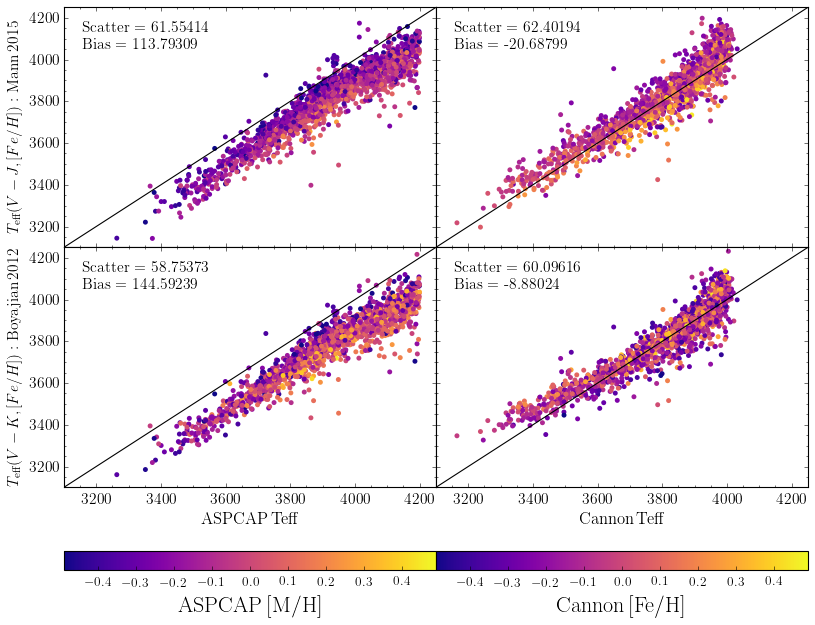

In [377]:
text1 = 'Scatter = %s \nBias = %s'%(round(np.std(vj_diff_ap),5), round(np.mean(vj_diff_ap),5))
text2 = 'Scatter = %s \nBias = %s'%(round(np.std(vj_diff),5), round(np.mean(vj_diff),5))
text3 = 'Scatter = %s \nBias = %s'%(round(np.std(vk_diff_ap),5), round(np.mean(vk_diff_ap),5))
text4 = 'Scatter = %s \nBias = %s'%(round(np.std(vk_diff),5), round(np.mean(vk_diff),5))
text5 = 'Scatter = %s \nBias = %s'%(round(np.std(vk_diff_ap2),5), round(np.mean(vk_diff_ap2),5))
text6 = 'Scatter = %s \nBias = %s'%(round(np.std(vk_diff2),5), round(np.mean(vk_diff2),5))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=[12,10], sharex=True, sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)

ax1.plot(x,x, color='k')
ax1.text(0.05, 0.95, text1, fontsize=14, transform=ax1.transAxes, verticalalignment='top')
im1 = ax1.scatter(apass_match['TEFF_APOGEE'], vj_teff_ap, edgecolor='none', c=np.clip(apass_match['M_H_APOGEE'],-.5,.5),
                  cmap='plasma')
ax1.set_xlim(3100,4250)
ax1.set_ylim(3100,4250)
ax1.set_ylabel(r'$T_{\rm eff}(V-J, [Fe/H]): {\rm Mann \, 2015}$', fontsize=14)

ax2.plot(x,x, color='k')
ax2.text(0.05, 0.95, text2, fontsize=14, transform=ax2.transAxes, verticalalignment='top')
im2 = ax2.scatter(apass_match['TEFF'], vj_teff, edgecolor='none', c=apass_match['FE_H'], cmap='plasma')

#===========
ax3.plot(x,x, color='k')
ax3.text(0.05, 0.95, text5, fontsize=14, transform=ax3.transAxes, verticalalignment='top')
ax3.scatter(apass_match['TEFF_APOGEE'], vk_teff_ap2, edgecolor='none', c=np.clip(apass_match['M_H_APOGEE'],-.5,.5),
           cmap='plasma')
ax3.set_ylabel(r'$T_{\rm eff}(V-K, [Fe/H]): {\rm Boyajian \, 2012}$', fontsize=14)

ax4.plot(x,x, color='k')
ax4.text(0.05, 0.95, text6, fontsize=14, transform=ax4.transAxes, verticalalignment='top')
ax4.scatter(apass_match['TEFF'], vk_teff2, edgecolor='none', c=apass_match['FE_H'], cmap='plasma')

ax3.set_xlabel(r'$\rm ASPCAP \, Teff$', fontsize=15)
ax4.set_xlabel(r'$\rm Cannon \, Teff$', fontsize=15)

#===========
im1.set_clim(-.49,.49)
im2.set_clim(-.49,.49)

ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)
ax3.tick_params(labelsize=14)
ax4.tick_params(labelsize=14)


# plt.tight_layout()
plt.minorticks_on()
cb1 = fig.colorbar(im1, ax=(ax1, ax3), orientation='horizontal', pad=.1)
cb1.set_label(r'${\rm ASPCAP \, [M/H]}$', fontsize=20)

cb2 = fig.colorbar(im2, ax=(ax2, ax4), orientation='horizontal', pad=.1)
cb2.set_label(r'${\rm Cannon \, [Fe/H]}$', fontsize=20)

# plt.savefig('../../paper/figures/aspcap_cannon_validation.png')
plt.show()